# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A/STAT121A/AC209A/CSCIE109A  Introduction to Data Science 


## Lab 3: plotting, K-NN Regression, Simple Linear Regression

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>

**Material prepared by**: David Sondak, Will Claybaugh, Pavlos Protopapas, and Eleni Kaxiras.

---

In [1]:
#RUN THIS CELL
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Learning Goals

By the end of this lab, you should be able to:
* Review `numpy` including 2-D arrays and understand array reshaping
* Use `matplotlib` to make plots
* Feel comfortable with simple linear regression
* Feel comfortable with $k$ nearest neighbors

**This lab corresponds to lectures 4 and 5 and maps on to homework 2 and beyond.**

## Table of Contents

#### <font color='red'> HIGHLIGHTS FROM PRE-LAB </font>

* [1 - Review of numpy](#first-bullet)
* [2 - Intro to matplotlib plus more ](#second-bullet)

#### <font color='red'> LAB 3 MATERIAL </font>

* [3 - Simple Linear Regression](#third-bullet)
* [4 - Building a model with `statsmodels` and `sklearn`](#fourth-bullet)
* [5 - Example: Simple linear regression with automobile data](#fifth-bullet)
* [6 - $k$Nearest Neighbors](#sixth-bullet)

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Displays the plots for us.
%matplotlib inline

In [3]:
# Use this as a variable to load solutions: %load PATHTOSOLUTIONS/exercise1.py. It will be substituted in the code
# so do not worry if it disappears after you run the cell.
PATHTOSOLUTIONS = 'solutions'

<a class="anchor" id="first-bullet"></a>
## 1 - Review of  the  `numpy` Python library

In lab1 we learned about the `numpy` library [(documentation)](http://www.numpy.org/) and its fast array structure, called the `numpy array`. 

In [4]:
# import numpy
import numpy as np

In [14]:
# make an array
my_array = np.array([1,4,9,16])
my_array

array([ 1,  4,  9, 16])

In [6]:
print(f'Size of my array: {my_array.size}, or length of my array: {len(my_array)}')
print (f'Shape of my array: {my_array.shape}')

Size of my array: 4, or length of my array: 4
Shape of my array: (4,)


#### Notice the way the shape appears in numpy arrays

- For a 1D array, .shape returns a tuple with 1 element (n,)
- For a 2D array, .shape returns a tuple with 2 elements (n,m)
- For a 3D array, .shape returns a tuple with 3 elements (n,m,p)

In [15]:
# How to reshape a 1D array to a 2D
# First input is number of rows
# Second is number of columns aka elements in each row
# -1 means computer does math that determines the number columns
my_array.reshape(2,-1)

array([[ 1,  4],
       [ 9, 16]])

Numpy arrays support the same operations as lists! Below we slice and iterate. 

In [16]:
print("array[2:4]:", my_array[2:4]) # A slice of the array

# Iterate over the array
for ele in my_array:
    print("element:", ele)

array[2:4]: [ 9 16]
element: 1
element: 4
element: 9
element: 16


Remember `numpy` gains a lot of its efficiency from being **strongly typed** (all elements are of the same type, such as integer or floating point). If the elements of an array are of a different type, `numpy` will force them into the same type (the longest in terms of bytes)

In [ ]:
# List of different types
# Numpy is strongly typed so all elements will become the type that is most complicated
mixed = np.array([1, 2.3, 'eleni', True])
print(type(1), type(2.3), type('eleni'), type(True))
mixed # all elements will become strings

Next, we push ahead to two-dimensional arrays and begin to dive into some of the deeper aspects of `numpy`.

In [17]:
# create a 2d-array by handing a list of lists
my_array2d = np.array([ [1, 2, 3, 4], 
                        [5, 6, 7, 8], 
                        [9, 10, 11, 12] 
])

my_array2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

### Array Slicing (a reminder...)

Numpy arrays can be sliced, and can be iterated over with loops.  Below is a schematic illustrating slicing two-dimensional arrays.  

 <img src="../images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>
 
Notice that the list slicing syntax still works!  
`array[2:,3]` says "in the array, get rows 2 through the end, column 3]"  
`array[3,:]` says "in the array, get row 3, all columns".

### Pandas Slicing (a reminder...)

`.iloc` is by position (position is unique), `.loc` is by label (label is not unique)

In [18]:
# With pandas is easier to do 2d arrays
# import cast dataframe 
cast = pd.read_csv('../data/cast.csv', encoding='utf_8')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [19]:
# get me rows 10 to 13 (python slicing style : exclusive of end) 
cast.iloc[10:13]

,title,year,name,type,character,n
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
12,Mixing Nia,1998,Michael 'babeepower' Viera,actor,Rapper,NaN


In [21]:
# get me columns 0 to 2 but all rows - use head()
cast.iloc[:, 0:2].head()

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015


In [22]:
# get me rows 10 to 13 AND only columns 0 to 2
cast.iloc[10:13, 0:2]

,title,year
10,When the Man Went South,2014
11,Little Angel (Angelita),2015
12,Mixing Nia,1998


In [23]:
# COMPARE: get me rows 10 to 13 (pandas slicing style : inclusive of end)
cast.loc[10:13]

# Note loc is inclusive while iloc is not

,title,year,name,type,character,n
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
12,Mixing Nia,1998,Michael 'babeepower' Viera,actor,Rapper,NaN
13,The Replacements,2000,Steven 'Bear'Boyd,actor,Defensive Tackle - Washington Sentinels,NaN


In [24]:
# give me columns 'year' and 'type' by label but only for rows 5 to 10
cast.loc[5:10,['year','type']]

,year,type
5,2015,actor
6,2015,actor
7,2009,actor
8,2014,actor
9,2014,actor
10,2014,actor


In [ ]:
# Aside x = y means if change y x will also change
# To avoid this can do y = x.copy()

# Important difference

<a class="anchor" id="second-bullet"></a>
## 2 - Plotting with matplotlib and beyond
<br>
<img style="float: center" src="https://imgs.xkcd.com/comics/convincing.png"> 

`matplotlib` is a very powerful `python` library for making scientific plots. 

We will not focus too much on the internal aspects of `matplotlib` in today's lab. There are many excellent tutorials out there for `matplotlib`.  For example,
* [`matplotlib` homepage](https://matplotlib.org/)
* [`matplotlib` tutorial](https://github.com/matplotlib/AnatomyOfMatplotlib)

Conveying your findings convincingly is an absolutely crucial part of any analysis. Therefore, you must be able to write well and make compelling visuals.  Creating informative visuals is an involved process and we won't cover that in this lab.  However, part of creating informative data visualizations means generating *readable* figures.  If people can't read your figures or have a difficult time interpreting them, they won't understand the results of your work.  Here are some non-negotiable commandments for any plot:
* Label $x$ and $y$ axes
* Axes labels should be informative
* Axes labels should be large enough to read
* Make tick labels large enough
* Include a legend if necessary
* Include a title if necessary
* Use appropriate line widths
* Use different line styles for different lines on the plot
* Use different markers for different lines

There are other important elements, but that list should get you started on your way.

We will work with `matplotlib` and `seaborn` for plotting in this class.  `matplotlib` is a very powerful `python` library for making scientific plots.  `seaborn` is a little more specialized in that it was developed for statistical data visualization.  We will cover some `seaborn` later in class. In the meantime you can look at the [seaborn documentation](https://seaborn.pydata.org)

First, let's generate some data.

#### Let's plot some functions

We will use the following three functions to make some plots:

* Logistic function:
  \begin{align*}
    f\left(z\right) = \dfrac{1}{1 + be^{-az}}
  \end{align*}
  where $a$ and $b$ are parameters.
* Hyperbolic tangent:
  \begin{align*}
    g\left(z\right) = b\tanh\left(az\right) + c
  \end{align*}
  where $a$, $b$, and $c$ are parameters.
* Rectified Linear Unit:
  \begin{align*}
    h\left(z\right) = 
    \left\{
      \begin{array}{lr}
        z, \quad z > 0 \\
        \epsilon z, \quad z\leq 0
      \end{array}
    \right.
  \end{align*}
  where $\epsilon < 0$ is a small, positive parameter.

You are given the code for the first two functions.  Notice that $z$ is passed in as a `numpy` array and that the functions are returned as `numpy` arrays.  Parameters are passed in as floats.

You should write a function to compute the rectified linear unit.  The input should be a `numpy` array for $z$ and a positive float for $\epsilon$.

In [25]:
import numpy as np

def logistic(z: np.ndarray, a: float, b: float) -> np.ndarray:
    """ Compute logistic function
      Inputs:
         a: exponential parameter
         b: exponential prefactor
         z: numpy array; domain
      Outputs:
         f: numpy array of floats, logistic function
    """
    
    den = 1.0 + b * np.exp(-a * z)
    return 1.0 / den

def stretch_tanh(z: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """ Compute stretched hyperbolic tangent
      Inputs:
         a: horizontal stretch parameter (a>1 implies a horizontal squish)
         b: vertical stretch parameter
         c: vertical shift parameter
         z: numpy array; domain
      Outputs:
         g: numpy array of floats, stretched tanh
    """
    return b * np.tanh(a * z) + c

def relu(z: np.ndarray, eps: float = 0.01) -> np.ndarray:
    """ Compute rectificed linear unit
      Inputs:
         eps: small positive parameter
         z: numpy array; domain
      Outputs:
         h: numpy array; relu
    """
    return np.fmax(z, eps * z)

Now let's make some plots.  First, let's just warm up and plot the logistic function.

In [27]:
# To plot functions, first create x values we want to plot
# Then calculate function for those x values

x = np.linspace(-5.0, 5.0, 100) # Equally spaced grid of 100 pts between -5 and 5

f = logistic(x, 1.0, 1.0) # Generate data

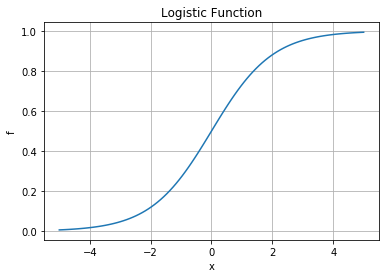

In [28]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function')
plt.grid(True)

#### Figures with subplots

Let's start thinking about the plots as objects. We have the `figure` object which is like a matrix of smaller plots named `axes`. You can use array notation when handling it. 

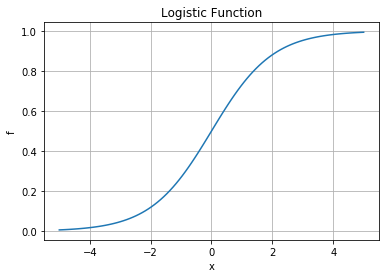

In [32]:
# We have figure object
# Figure is a 2x2 array
# means we have an ax in each element of array
# here the whole array is just 1x1 though...
# We could make subplots(2,3) and then set each ax by the indices

fig, ax = plt.subplots(1,1) # Get figure and axes objects

ax.plot(x, f) # Make a plot

# Create some labels
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.set_title('Logistic Function')

# Grid
ax.grid(True)

Wow, it's *exactly* the same plot!  Notice, however, the use of `ax.set_xlabel()` instead of `plt.xlabel()`.  The difference is tiny, but you should be aware of it.  I will use this plotting syntax from now on.

What else do we need to do to make this figure better?  Here are some options:
* Make labels bigger!
* Make line fatter
* Make tick mark labels bigger
* Make the grid less pronounced
* Make figure bigger

Let's get to it.

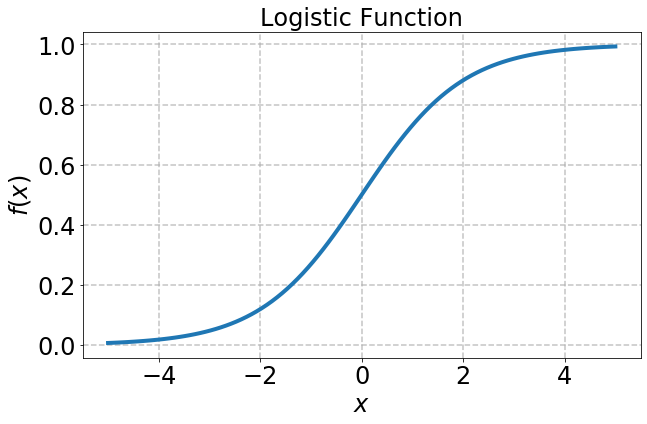

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

Notice:
* `lw` stands for `linewidth`.  We could also write `ax.plot(x, f, linewidth=4)`
* `ls` stands for `linestyle`.
* `alpha` stands for transparency.

The only thing remaining to do is to change the $x$ limits.  Clearly these should go from $-5$ to $5$.

In [ ]:
#fig.savefig('logistic.png')

# Put this in a markdown cell and uncomment this to check what you saved.
# ![](../images/logistic.png)

#### Resources
If you want to see all the styles available, please take a look at the documentation.
* [Line styles](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle)
* [Marker styles](https://matplotlib.org/2.0.1/api/markers_api.html#module-matplotlib.markers)
* [Everything you could ever want](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_marker)

We haven't discussed it yet, but you can also put a legend on a figure.  You'll do that in the next exercise.  Here are some additional resources:
* [Legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)
* [Grid](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html)

`ax.legend(loc='best', fontsize=24);`

<div class="exercise"><b>Exercise</b></div>

Do the following:
* Make a figure with the logistic function, hyperbolic tangent, and rectified linear unit.
* Use different line styles for each plot
* Put a legend on your figure

Here's an example of a figure:
![](../images/nice_plots.png)

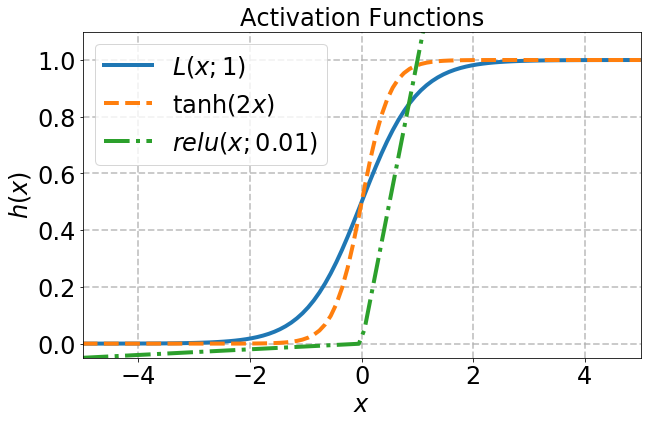

In [40]:
# your code here

# First get the data
f = logistic(x, 2.0, 1.0)
g = stretch_tanh(x, 2.0, 0.5, 0.5)
h = relu(x)

fig, ax = plt.subplots(1,1, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax.plot(x, f, lw=4, ls='-', label=r'$L(x;1)$')
ax.plot(x, g, lw=4, ls='--', label=r'$\tanh(2x)$')
ax.plot(x, h, lw=4, ls='-.', label=r'$relu(x; 0.01)$')

# Make the tick labels readable
ax.tick_params(labelsize=24)

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$h(x)$', fontsize=24)
ax.set_title('Activation Functions', fontsize=24)

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best', fontsize=24);

#fig.savefig('../images/nice_plots.png')

<div class="exercise"><b>Exercise</b></div>

These figures look nice in the plot and it makes sense for comparison. Now let's put the 3 different figures in separate plots.

* Make a separate plot for each figure and line them up on the same row.

AttributeError: 'numpy.ndarray' object has no attribute 'tick_params'

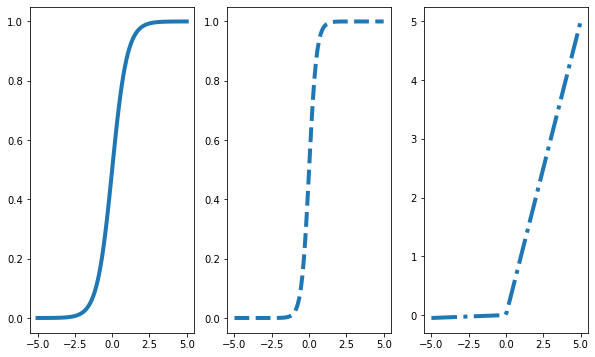

In [54]:
#ax is the name of the element in the figure array

# First get the data
f = logistic(x, 2.0, 1.0)
g = stretch_tanh(x, 2.0, 0.5, 0.5)
h = relu(x)

fig, ax = plt.subplots(1,3, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax[0].plot(x, f, lw=4, ls='-', label=r'$L(x;1)$')
ax[1].plot(x, g, lw=4, ls='--', label=r'$\tanh(2x)$')
ax[2].plot(x, h, lw=4, ls='-.', label=r'$relu(x; 0.01)$')

# Will work if below here make each with [0] [1] [2] etc and adjust

# Make the tick labels readable
ax.tick_params(labelsize=24)
ax.tick_params(labelsize=24)
ax.tick_params(labelsize=24)

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$h(x)$', fontsize=24)
ax.set_title('Activation Functions', fontsize=24)
ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$h(x)$', fontsize=24)
ax.set_title('Activation Functions', fontsize=24)
ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$h(x)$', fontsize=24)
ax.set_title('Activation Functions', fontsize=24)

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)
ax.grid(True, lw=1.75, ls='--', alpha=0.75)
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best', fontsize=24);
ax.legend(loc='best', fontsize=24);
ax.legend(loc='best', fontsize=24);


In [53]:
%load solutions/three_subplots.py

ValueError: 'solutions/three_subplots.py' was not found in history, as a file, url, nor in the user namespace.

<div class="exercise"><b>Exercise</b></div>

* Make a grid of 2 x 3 separate plots, 3 will be empty. Just plot the functions and do not worry about cosmetics. We just want you ro see the functionality.

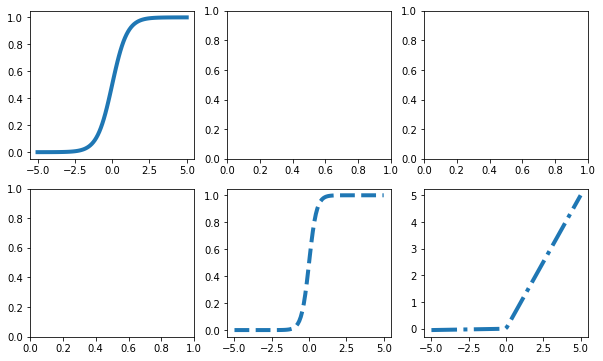

In [56]:
fig, ax = plt.subplots(2,3, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax[0,0].plot(x, f, lw=4, ls='-', label=r'$L(x;1)$')
ax[1,1].plot(x, g, lw=4, ls='--', label=r'$\tanh(2x)$')
ax[1,2].plot(x, h, lw=4, ls='-.', label=r'$relu(x; 0.01)$')

In [ ]:
# %load solutions/six_subplots.py

<a class="anchor" id="third-bullet"></a>
## 3 - Simple Linear Regression

Linear regression and its many extensions are a workhorse of the statistics and data science community, both in application and as a reference point for other models. Most of the major concepts in machine learning can be and often are discussed in terms of various linear regression models. Thus, this section will introduce you to building and fitting linear regression models and some of the process behind it, so that you can 1) fit models to data you encounter 2) experiment with different kinds of linear regression and observe their effects 3) see some of the technology that makes regression models work.


### Linear regression with a toy dataset
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

<div class="exercise"><b>Exercise (for home)</b></div>

* Make two numpy arrays out of this data, x_train and y_train
* Check the dimentions of these arrays
* Try to reshape them into a different shape
* Make points into a very simple scatterplot
* Make a better scatterplot

In [ ]:
# your code here

In [66]:
# solution
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [67]:
x_train.shape
x_train

array([1, 2, 3])

In [68]:
# We run reshape because sklearn doesn't like 1-D data
# Reshape puts vectors into a matrix form even though they are basically the same

x_train = x_train.reshape(3,1)
x_train.shape
x_train

array([[1],
       [2],
       [3]])

In [60]:
xx = np.array([[1,3,5],[6,2,1]])
xx.shape

(2, 3)

In [61]:
# reshape this too for sklearn

xx = xx.reshape(3,-1)
xx

array([[1, 3],
       [5, 6],
       [2, 1]])

(3, 1) (3,)


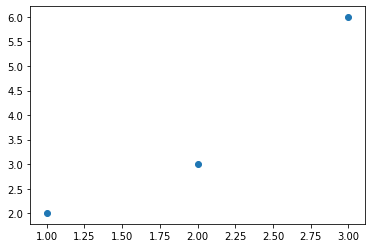

In [62]:
# %load solutions/simple_scatterplot.py
# Make a simple scatterplot
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)


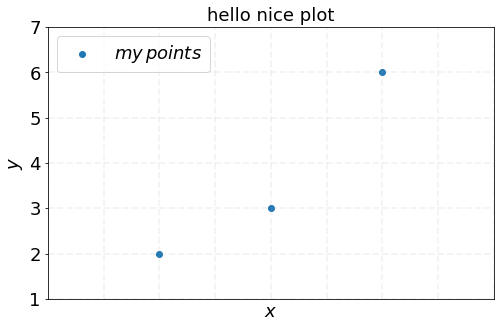

In [69]:
# %load solutions/nice_scatterplot.py
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$my points$')
    #ax.scatter(x, y, label='$my points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'hello nice plot')



#### Formulae
Linear regression is special among the models we study because it can be solved explicitly. While most other models (and even some advanced versions of linear regression) must be solved itteratively, linear regression has a formula where you can simply plug in the data.

For the single predictor case it is:
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
    
Where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.

From the re-aranged second equation we can see that the best-fit line  passes through $(\bar{x},\bar{y})$, the center of mass of the data

From any of the first equations, we can see that the slope of the line has to do with whether or not an x value that is above/below the center of mass is typically paired with a y value that is likewise above/below, or typically paired with one that is opposite.

###  Building a model from scratch
In this part, we will solve the equations for simple linear regression and find the best fit solution to our toy problem.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

We have to reshape our arrrays to 2D. We will see later why.

<div class="exercise"><b>Exercise</b></div>

* make an array with shape (2,3)
* reshape it to a size that you want

In [70]:
# your code here
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [ ]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

In [ ]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

* Why the empty brackets? (The numerator and denominator are scalars, as expected.)

In [ ]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))
print(f'The best fit is {beta_0}')

<div class="exercise"><b>Exercise</b></div>

Turn the code from the above cells into a function called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.

To do this, copy and paste the code from the above cells below and adjust the code as needed, so that the training data becomes the input and the betas become the output.

```python
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    
    return
```

Check your function by calling it with the training data from above and printing out the beta values.

In [ ]:
# Your code here

In [ ]:
# %load solutions/simple_linear_regression_fit.py
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])


* Let's run this function and see the coefficients

In [ ]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

<div class="exercise"><b>Exercise</b></div>

* Do the values of `beta0` and `beta1` seem reasonable?
* Plot the training data using a scatter plot.
* Plot the best fit line with `beta0` and `beta1` together with the training data.

In [ ]:
# Your code here

In [ ]:
# %load solutions/best_fit_scatterplot.py
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = beta_0 + beta_1 * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');


The values of `beta0` and `beta1` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

<a class="anchor" id="fourth-bullet"></a>
## 4 - Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from `statsmodels` and `sklearn` to the $\beta$ values that we found from above with our own implementation.

For the purposes of this lab, `statsmodels` and `sklearn` do the same thing.  More generally though, `statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

Below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix, so we include it manually with `sm.add_constant`.

In [71]:
import statsmodels.api as sm

In [72]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# This is basically saying the that coefficients of terms in X matrix are 1???
# X = [1X1 + 1X2 + 1X3] ... times b0 b1 .... look this up why you need this column

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coef from statsmodels are: beta_0 = -0.333333 and beta_1 = 2.000000


Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

In [73]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     12.00
Date:                Thu, 19 Sep 2019   Prob (F-statistic):              0.179
Time:                        17:31:59   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3333      1.247     -0.267      0.8

Now let's turn our attention to the `sklearn` library.

In [74]:
from sklearn import linear_model

In [76]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coefficients from the sklearn package are: beta_0 = -0.333333 and beta_1 = 2.000000


We should feel pretty good about ourselves now, and we're ready to move on to a real problem!

### The `scikit-learn` library and the shape of things

Before diving into a "real" problem, let's discuss more of the details of `sklearn`.

`Scikit-learn` is the main `Python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split()`. 

Use the following to add the library into your code:

```python
import sklearn 
```

In `scikit-learn`, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `fit()` always takes two arguments:
```python
estimator.fit(Xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and `KNeighborsRegressor`.

It is very important to understand that `Xtrain` must be in the form of a **2x2 array** with each row corresponding to one sample, and each column corresponding to the feature values for that sample.

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

![](../images/featurematrix.png)

<!--![](../images/sklearn2.jpg)-->

### Practice with `sklearn` and a real dataset
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [77]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [78]:
# Fix the column title 
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [79]:
dfcars.shape

(32, 12)

#### Searching for values: how many cars have 4 gears?

In [80]:
len(dfcars[dfcars.gear == 4].drop_duplicates(subset='car name', keep='first'))

12

Next, let's split the dataset into a training set and test set.

In [81]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [82]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


Now we have training and test data.  We still need to select a predictor and a response from this dataset.  Keep in mind that we need to choose the predictor and response from both the training and test set.  You will do this in the exercises below.  However, we provide some starter code for you to get things going.

In [83]:
traindf.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [84]:
# Extract the response variable that we're interested in
y_train = traindf.mpg
y_train

25    27.3
12    17.3
0     21.0
4     18.7
16    14.7
5     18.1
13    15.2
11    16.4
23    13.3
1     21.0
2     22.8
26    26.0
3     21.4
21    15.5
27    30.4
22    15.2
18    30.4
31    21.4
20    21.5
7     24.4
10    17.8
14    10.4
28    15.8
19    33.9
6     14.3
Name: mpg, dtype: float64

<div class="exercise"><b>Exercise</b></div>

Use slicing to get the same vector `y_train`

----

Now, notice the shape of `y_train`.

In [85]:
y_train.shape, type(y_train)

((25,), pandas.core.series.Series)

### Array reshape
This is a 1D array as should be the case with the **Y** array.  Remember, `sklearn` requires a 2D array only for the predictor array.  You will have to pay close attention to this in the exercises later. `Sklearn` doesn't care too much about the shape of `y_train`.

The whole reason we went through that whole process was to show you how to reshape your data into the correct format.

**IMPORTANT:** Remember that your response variable `ytrain` can be a vector but your predictor variable `xtrain` ***must*** be an array!

<a class="anchor" id="fifth-bullet"></a>
## 5 - Example: Simple linear regression with automobile data
We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

<div class="exercise"><b>Exercise in pairs</b></div>

* Pick one variable to use as a predictor for simple linear regression.  Discuss your reasons with the person next to you.  
* Justify your choice with some visualizations.  
* Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

In [86]:
x_wt = dfcars.wt
x_wt.shape

(32,)

In [ ]:
# Note we are looking at test set
# Normally wouldn't do this, would only look at test set once make predictions on training set



In [88]:
%load solutions/cars_simple_EDA.py

ValueError: 'solutions/cars_simple_EDA.py' was not found in history, as a file, url, nor in the user namespace.

<div class="exercise"><b>Exercise</b></div>

* Use `sklearn` to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.  
* Plot the data and the prediction.  
* Print out the mean squared error for the training set and the test set and compare.

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfcars = pd.read_csv("../data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [90]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

# Must reshape X. Algorithm wants X to be 2-D, it doesn't care if Y is 2-D

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [91]:
# Same here reshape

y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

In [92]:
# Let's take another look at our data
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [96]:
# And out train and test sets 
y_train.shape, X_train.shape

((25,), (25, 1))

In [97]:
y_test.shape, X_test.shape

((7,), (7, 1))

In [98]:
#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)


# The r2 of the test set is what matters
# r2 of the training set will be higher because that's what we trained on


r2 = regression.score(X_test, y_test)
print(f'R^2 = {r2:.5}')

R^2 = 0.68798


In [99]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

0.7701379909791616
12.475985659918814
7.7736977663875155
Coefficients: 
 -5.336941400557079 36.93731031351841


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))

<a class="anchor" id="sixth-bullet"></a>
## 6 - $k$-nearest neighbors

Now that you're familiar with `sklearn`, you're ready to do a KNN regression.  

Sklearn's regressor is called `sklearn.neighbors.KNeighborsRegressor`. Its main parameter is the `number of nearest neighbors`. There are other parameters such as the distance metric (default for 2 order is the Euclidean distance). For a list of all the parameters see the [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Let's use $5$ nearest neighbors.

In [100]:
# Import the library
from sklearn.neighbors import KNeighborsRegressor

In [101]:
# Set number of neighbors
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [102]:
# Fit the regressor - make sure your numpy arrays are the right shape
knnreg.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnreg.score(X_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.87181


In [103]:
knnreg.predict(X_test)

array([20.14, 14.  , 15.3 , 26.3 , 19.56, 17.06, 16.88])

<div class="exercise"><b>Exercise</b></div>

Calculate and print the $R^{2}$ score on the test set

In [105]:
r2_test = knnreg.score(X_test, y_test)
r2_test

0.6992188728167332

Not so good? Lets vary the number of neighbors and see what we get.

In [106]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Make our lives easier by entering the k values from a list
k_list = [1, 2, 4, 15]

# Do a bunch of KNN regressions
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Store the regressors in a dictionary
    regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 2: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'),
 4: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform'),
 15: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')}

Now let's plot all the k values in same plot.

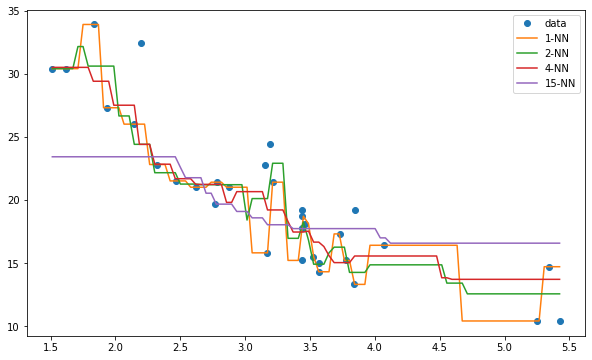

In [107]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

<div class="exercise"><b>Exercise</b></div>

Explain what you see in the graph. **Hint** Notice how the $1$-NN goes through every point on the training set but utterly fails elsewhere. 

Lets look at the scores on the training set.

Text(0, 0.5, '$R^{2}$')

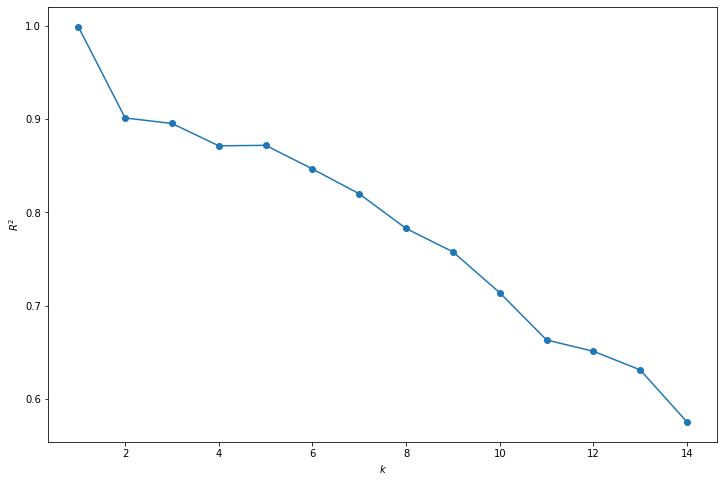

In [108]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

# R^2 on training goes to 0 as number of neighbors goes up
# But what we care about is for test set

<div class="exercise"><b>Exercise</b></div>

* Why do we get a perfect $R^2$ at k=1 for the training set?
* Make the same plot as above on the *test* set.
* What is the best $k$?

In [109]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_test, y_test) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 7, n_neighbors = 8

In [ ]:
# %load solutions/knn_regression.py

In [ ]:
# solution to previous exercise
r2_test = knnreg.score(X_test, y_test)
print(f'kNN model with {k} neighbors gives R^2 on the test set: {r2_test:.5}')